# Compute inflow profiles from YZ planes

In [2]:
%%capture
# Important header information
naluhelperdir = '/projects/AWAKEN/lcheung/awaken.github/naluhelperscripts/'
#naluhelperdir = '/ascldap/users/lcheung/local/Git/naluhelperscripts/'

# Import libraries
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(1, naluhelperdir)
from numpy import *
import pickle

from matplotlib import animation
from IPython.display import HTML
import plotSamplePlaneGUI as pplane
import avgSamplePlanes as avgplane

from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [10]:
rotorD = 127
A      = np.pi/4*rotorD**2  # Rotor Area
zHH    = 90
x0     = 2000
y0     = 2560
writeoutputs = True
datadir= '/PlaneData'

In [4]:
#turbineDir   = '/pscratch/mlblayl/AWAKEN/Neutral_Turbine_Yaw'
precursorDir = '/pscratch/mlblayl/AWAKEN/Neutral_NoTurbine_Yaw'

In [5]:
expr      = 'sqrt(velocity_probe[0]**2 + velocity_probe[1]**2)'
planenum  = 0
colormap  = 'coolwarm'
nlevels   = 101
clevels   = np.linspace(0, 10, nlevels)

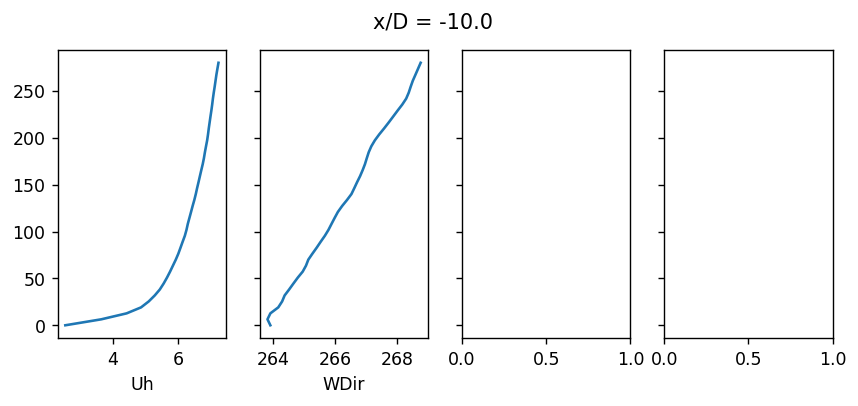

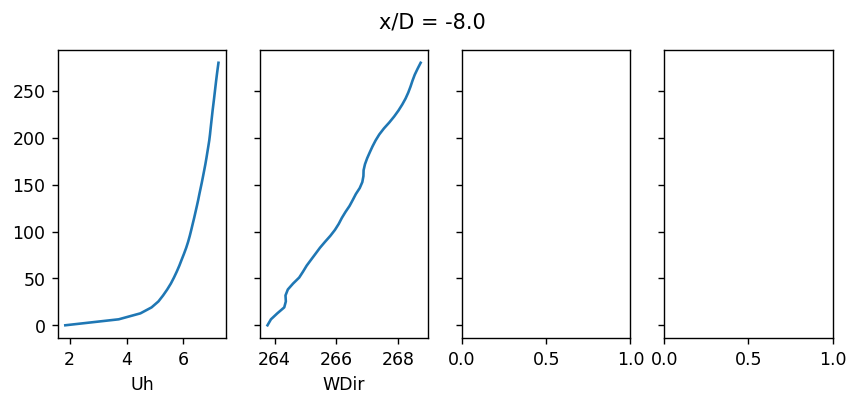

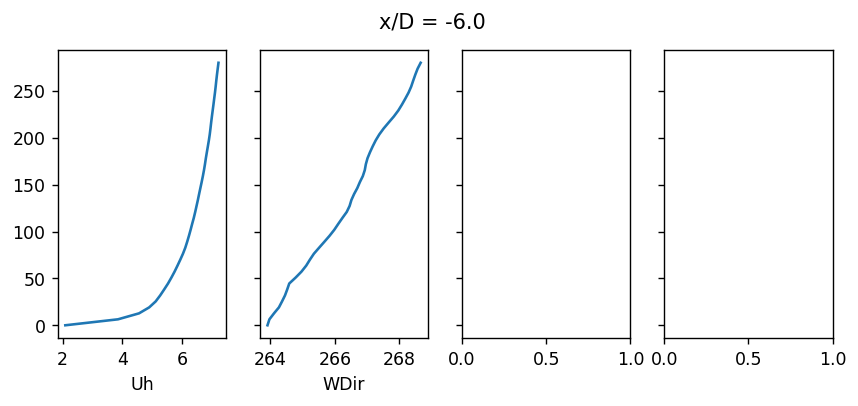

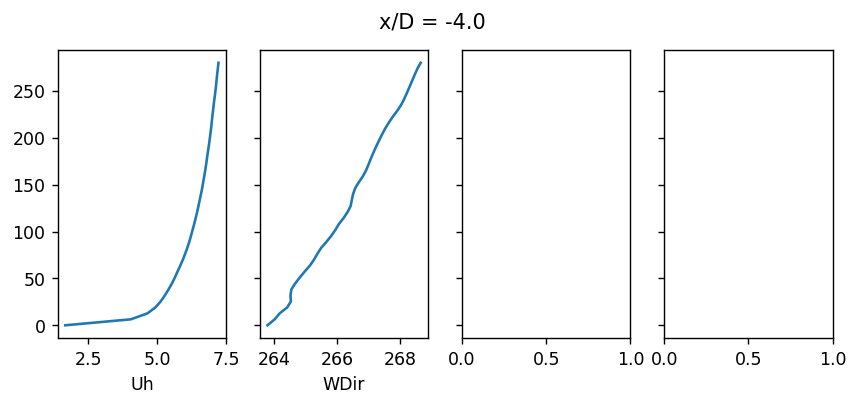

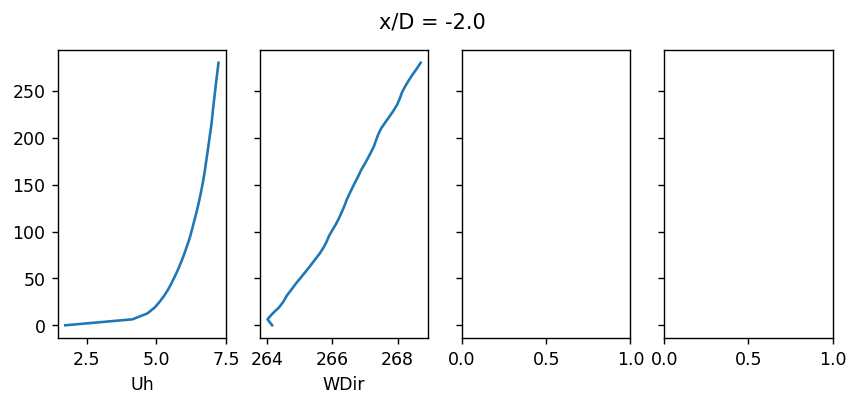

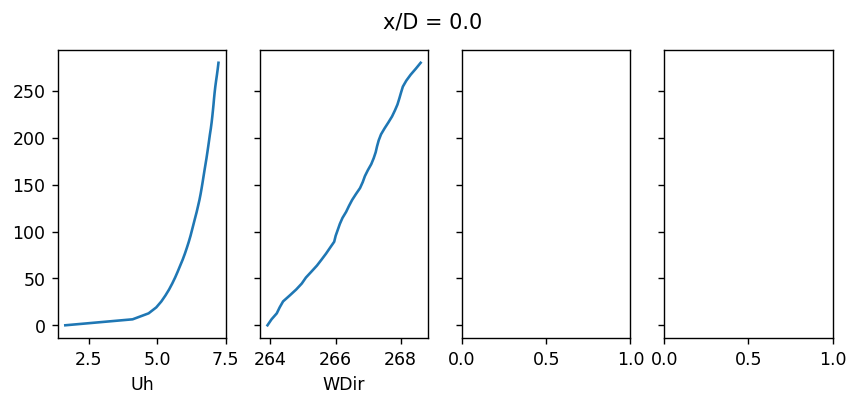

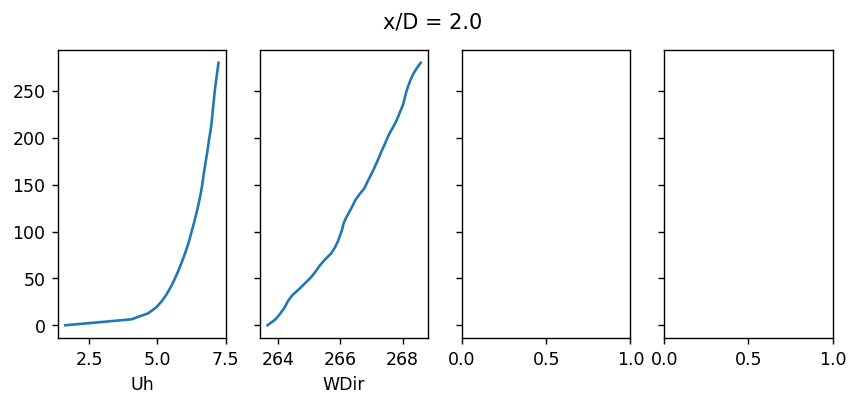

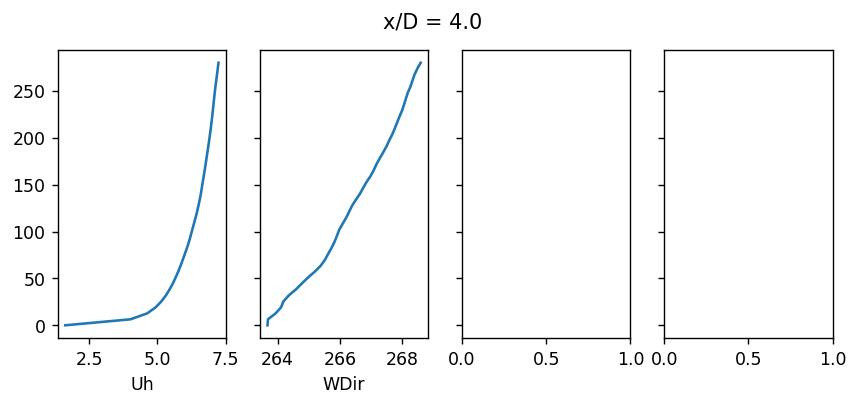

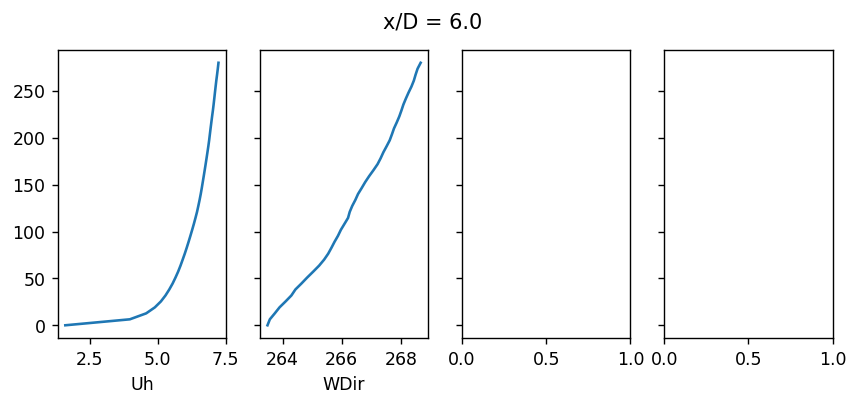

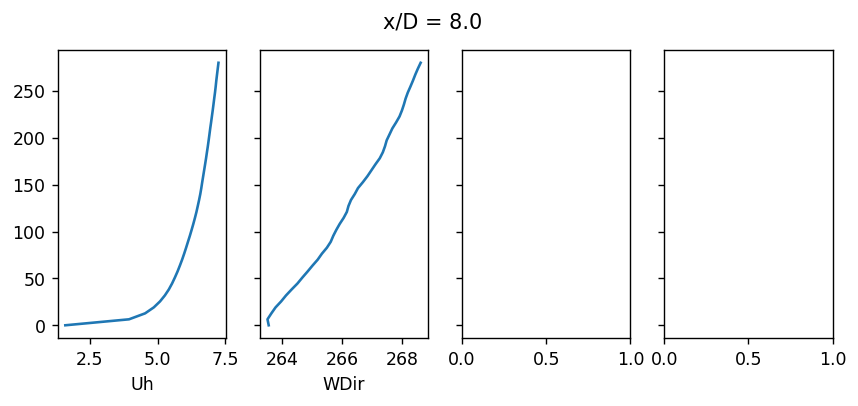

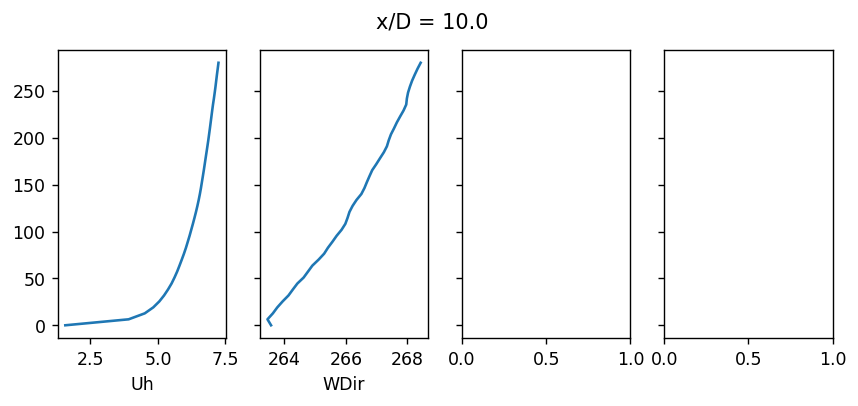

In [17]:
allplanes  = [-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
plotplanes = [-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10]


for iplane in allplanes:
    #planefile='Nalu_Neutral_YZslice_%02iD_long.dat'%iplane
    noturbfile='Nalu_Neutral_NT_YZslice_%02iD_long.dat'%iplane
    noturbfileUU='Nalu_Neutral_NT_YZslice_%02iD_longUU.dat'%iplane
    
    
    noturb_avgdat,   time, noturb_headers   =pplane.loadplanefile(precursorDir+'/'+noturbfile, checkcomma=False)
    noturb_avgdatUU, time, noturb_headersUU =pplane.loadplanefile(precursorDir+'/'+noturbfileUU, checkcomma=False)
    # Grab the primitives
    Z1, Y1, U  = pplane.getplotplane(noturb_avgdat, planenum, 6, headers=noturb_headers, xycol=[4,5])
    Z1, Y1, V  = pplane.getplotplane(noturb_avgdat, planenum, 7, headers=noturb_headers, xycol=[4,5])
    Z1, Y1, W  = pplane.getplotplane(noturb_avgdat, planenum, 8, headers=noturb_headers, xycol=[4,5])
    Z1, Y1, T  = pplane.getplotplane(noturb_avgdat, planenum, 9, headers=noturb_headers, xycol=[4,5])

    # Grab the reynolds stresses
    Z1, Y1, UU  = pplane.getplotplane(noturb_avgdatUU, planenum, 6, headers=noturb_headersUU, xycol=[4,5])
    Z1, Y1, VV  = pplane.getplotplane(noturb_avgdatUU, planenum, 7, headers=noturb_headersUU, xycol=[4,5])
    Z1, Y1, WW  = pplane.getplotplane(noturb_avgdatUU, planenum, 8, headers=noturb_headersUU, xycol=[4,5])

    # MYRA: Compute whatever you need here
    Uh = np.sqrt(U**2 + V**2)
    WDir = 270 - np.arctan2(V, U)*180/np.pi

    
    # Average some profiles
    zvec = Z1[:,0]
    
    U_profile = np.mean(U, axis=1)
    V_profile = np.mean(V, axis=1)    
    W_profile = np.mean(W, axis=1)
    T_profile = np.mean(T, axis=1)
    
    Uh_profile = np.mean(Uh, axis=1)
    WDir_profile = np.mean(WDir, axis=1)
    # TKE 
    #TKE = 0.5*(RPdb['uu_avg'][iplane,:,:] + RPdb['vv_avg'][iplane,:,:] + RPdb['ww_avg'][iplane,:,:])
    TKE = 0.5*(UU+VV+WW)
    TKE_profile = np.mean(TKE, axis=1)
    
    # TI_horiz
    #TI = np.sqrt(RPdb['uu_avg'][iplane,:,:] + RPdb['vv_avg'][iplane,:,:])/Uh
    TI = np.sqrt(UU+VV)/Uh
    TI_profile = np.mean(TI, axis=1)
    
    if iplane in plotplanes:
        fig, axs = plt.subplots(1,4,figsize=(8,3), dpi=125, sharey=True)
        axs[0].plot(Uh_profile, zvec); axs[0].set_xlabel('Uh')
        axs[1].plot(WDir_profile, zvec); axs[1].set_xlabel('WDir')
       # axs[2].plot(V_profile, zvec); axs[2].set_xlabel('V')
       # axs[3].plot(T_profile, zvec); axs[3].set_xlabel('T')
        plt.suptitle('x/D = %0.1f'%iplane)
        
    
    if writeoutputs:
        # MYRA: Stack some data here and write it out
        fname = 'Nalu_%02iD_profile.txt'%iplane
        ave_header = ['z','WS','WD','Th','TKE','TI']
        ah = ' '.join(ave_header)
        savedat = np.vstack((zvec, Uh_profile,WDir_profile,T_profile,TKE_profile,TI_profile))
        np.savetxt(precursorDir+datadir+'/'+fname, savedat.transpose(), header=ah)
        
    


In [13]:
for iplane in allplanes:
    #planefile='Nalu_Neutral_YZslice_%02iD_long.dat'%iplane
    noturbfile='Nalu_Neutral_NT_YZslice_%02iD_long.dat'%iplane
    noturbfileUU='Nalu_Neutral_NT_YZslice_%02iD_longUU.dat'%iplane
    print(noturbfileUU)

Nalu_Neutral_NT_YZslice_-4D_longUU.dat
Nalu_Neutral_NT_YZslice_-2D_longUU.dat
Nalu_Neutral_NT_YZslice_00D_longUU.dat
Nalu_Neutral_NT_YZslice_02D_longUU.dat
Nalu_Neutral_NT_YZslice_04D_longUU.dat
